<H1>MTA Passenger Data Analisys</H1>

Evaluate turnstile data to look for optimal locations for positioning staff for fundraising

In [35]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import datetime as dt

In [6]:
# Read the datafiles
data_path = '~/Documents/Data/'
data_file_list = ['turnstile_191102.txt',
                 'turnstile_191109.txt',
                 'turnstile_191116.txt',
                 'turnstile_191130.txt',
                 'turnstile_191207.txt',
                 'turnstile_191214.txt',
                 'turnstile_191221.txt',
                 'turnstile_191228.txt'
                 'turnstile_200104.txt']

booth_key_filename = 'Remote-Booth-Station.csv'


In [7]:
turnstiles1 = pd.read_csv(data_path + data_file_list[0])
booth_key = pd.read_csv(data_path + booth_key_filename)
turnstiles1, booth_key

(          C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
 0        A002  R051  02-00-00          59 ST  NQR456W      BMT  10/26/2019   
 1        A002  R051  02-00-00          59 ST  NQR456W      BMT  10/26/2019   
 2        A002  R051  02-00-00          59 ST  NQR456W      BMT  10/26/2019   
 3        A002  R051  02-00-00          59 ST  NQR456W      BMT  10/26/2019   
 4        A002  R051  02-00-00          59 ST  NQR456W      BMT  10/26/2019   
 ...       ...   ...       ...            ...      ...      ...         ...   
 206041  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/01/2019   
 206042  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/01/2019   
 206043  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/01/2019   
 206044  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/01/2019   
 206045  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/01/2019   
 
             TIME     DESC  ENTRIES  \
 0       00

In [17]:
turnstiles1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,deltaEntry
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,14
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,15
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,112
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,292


In [44]:
turnstiles1.columns = [x.strip() for x in turnstiles1.columns]
turnstiles1.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'deltaEntry', 'deltaExit'],
      dtype='object')

In [43]:
delta_entry = [0]
delta_exit = [0]
date_list = [dt.datetime.strptime(turnstiles1['DATE'][0], '%m/%d/%y')]
for row in range(1, len(turnstiles1)) :
    delta_entry.append(turnstiles1['ENTRIES'][row] - turnstiles1['ENTRIES'][row - 1])
    delta_exit.append(turnstiles1['EXITS'][row] - turnstiles1['EXITS'][row - 1])
                 

turnstiles1['deltaEntry'] = deltaEntry
turnstiles1['deltaExit'] = deltaExit
turnstiles1

ValueError: unconverted data remains: 19

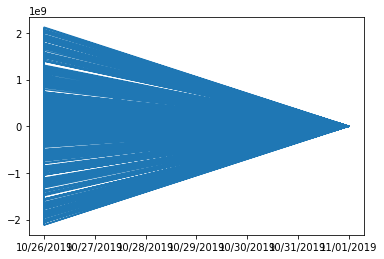

In [34]:
mat.plot(turnstiles1.DATE, turnstiles1.deltaEntry)